In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import sys
sys.path.append("/Users/caihao/PycharmProjects/insight_project/")

import warnings
from data.config import raw_data_dir, processed_data_dir, cleaned_data_dir

warnings.filterwarnings('ignore')
tweets_dir  = "/Users/caihao/Dropbox/TEMP/tweets/"

## Distribution of Some Features

In [3]:
# read processed data.
df = pd.read_csv(processed_data_dir + '/companies_all_labeled_final.csv')
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'twitter_username', 'first2last_funding_days',
       'twit_since', 'twit_until', 'WILL', 'days_since_series_a', 'WHEN',
       'series_a_date', 'preA_timespan', 'postA_timespan', 'all_tweet_num',
       'preA_tweet_num', 'postA_tweet_num', 'preA_tweet_freq',
       'postA_tweet_freq', 'preA_tweet_avglength', 'postA_tweet_avglength',
       'preA_tweet_content_richness', 'postA_tweet_content_richness',
       'preA_tweet_interactiveness', 'postA_tweet_interactiveness',
       'status_feature', 'country_feature', 'age_feature',
       'days_since_first_funding', 'tweet_num_change', 'tweet_freq_change',
       'tweet_avglength_change', 'tweet_content_richness_change',
       'tweet_interactiv

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11044fc50>,
      dtype=object)

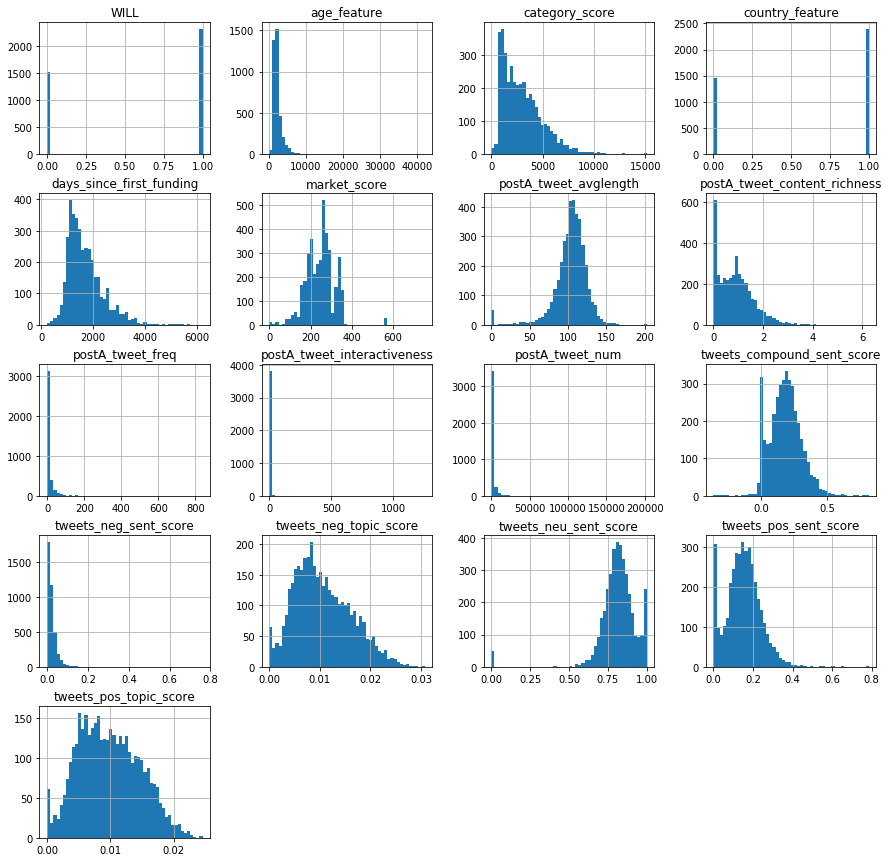

In [4]:
# distribution of the features.
selected_features = ['country_feature', 'age_feature',\
                     'days_since_first_funding', 'category_score', 'market_score',\
                     'postA_tweet_num', 'postA_tweet_freq', 'postA_tweet_avglength',\
                     'postA_tweet_content_richness', 'postA_tweet_interactiveness',\
                     'tweets_pos_topic_score', 'tweets_neg_topic_score',\
                     'tweets_neg_sent_score', 'tweets_neu_sent_score',\
                     'tweets_pos_sent_score', 'tweets_compound_sent_score',\
                     'WILL',]

new_df = df[selected_features]
new_df.hist(bins=50, figsize=(15, 15))

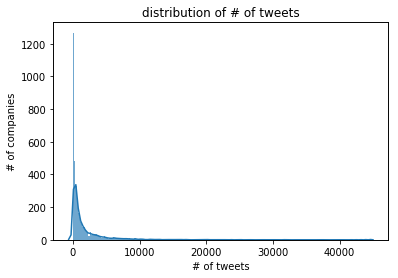

In [5]:
# distribution of "# of tweets".
fig, ax = plt.subplots(figsize=(6,4))
ax_ = ax.twinx()
sns.distplot(new_df.loc[(new_df.postA_tweet_num<50000), 'postA_tweet_num'],\
             bins=250,\
             kde=False,\
             norm_hist=False,\
             ax=ax)
sns.distplot(new_df.loc[(new_df.postA_tweet_num<50000), 'postA_tweet_num'],
             bins=250,\
             kde=True,\
             norm_hist=False,\
             ax=ax_)
ax_.set_yticks([])
ax.set_title('distribution of # of tweets')
ax.set_xlabel('# of tweets')
ax.set_ylabel('# of companies')
# plt.savefig('./figures/numoftweets_dists.png')
plt.show()

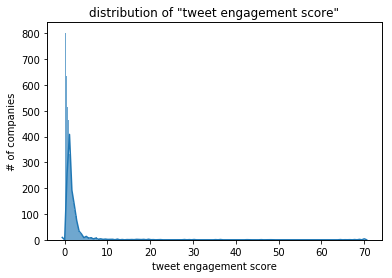

In [6]:
# distribution of "tweet interactiveness"/"tweet engagement score".
fig, ax = plt.subplots(figsize=(6,4))
ax_ = ax.twinx()
sns.distplot(new_df.loc[new_df.postA_tweet_interactiveness<100, 'postA_tweet_interactiveness'],\
             bins=250,\
             norm_hist=False,\
             kde=False,\
             ax=ax)
sns.distplot(new_df.loc[new_df.postA_tweet_interactiveness<100, 'postA_tweet_interactiveness'],\
             bins=250,\
             norm_hist=False,\
             kde=True,\
             ax=ax_)
ax_.set_yticks([])
ax.set_title('distribution of "tweet engagement score"')
ax.set_xlabel('tweet engagement score')
ax.set_ylabel('# of companies')
# plt.savefig('./figures/tweet_engagement_score_dist.png')
plt.show()

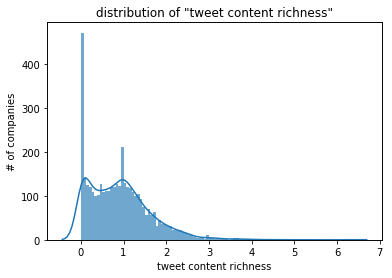

In [7]:
# distribution of "tweet content richness".
fig, ax = plt.subplots(figsize=(6,4))
ax_ = ax.twinx()
sns.distplot(new_df['postA_tweet_content_richness'],\
             bins=100,\
             kde=False,\
             ax=ax)
sns.distplot(new_df['postA_tweet_content_richness'],\
             bins=100,\
             kde=True,\
             ax=ax_)
ax_.set_yticks([])
ax.set_title('distribution of "tweet content richness"')
ax.set_xlabel('tweet content richness')
ax.set_ylabel('# of companies')
# plt.savefig('./figures/tweet_content_richness_dist.png')
plt.show()

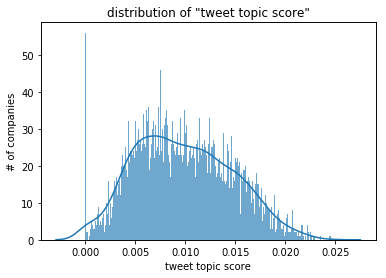

In [8]:
# distribution of "tweet positive topic score"/"tweet topic score".
fig, ax = plt.subplots(figsize=(6,4))
ax_ = ax.twinx()
sns.distplot(new_df['tweets_pos_topic_score'],\
             bins=250,\
             kde=False,\
             ax=ax)
sns.distplot(new_df['tweets_pos_topic_score'],\
             bins=250,\
             kde=True,\
             ax=ax_)
ax_.set_yticks([])
ax.set_title('distribution of "tweet topic score"')
ax.set_xlabel('tweet topic score')
ax.set_ylabel('# of companies')
# plt.savefig('./figures/tweet_topic_score_dist.png')
plt.show()

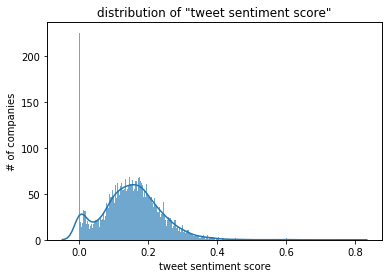

In [9]:
# distribution of "tweet positive sentiment score"/"tweet sentiment score".
fig, ax = plt.subplots(figsize=(6,4))
ax_ = ax.twinx()
sns.distplot(new_df['tweets_pos_sent_score'],\
             bins=250,\
             kde=False,\
             ax=ax)
sns.distplot(new_df['tweets_pos_sent_score'],\
             bins=250,\
             kde=True,\
             ax=ax_)
ax_.set_yticks([])
ax.set_title('distribution of "tweet sentiment score"')
ax.set_xlabel('tweet sentiment score')
ax.set_ylabel('# of companies')
# plt.savefig('./figures/tweet_sentiment_score_dist.png')
plt.show()

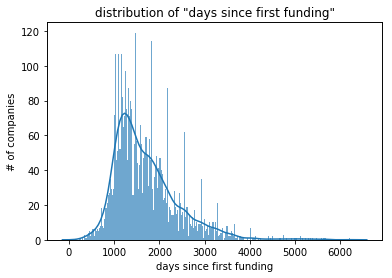

In [10]:
# distribution of "days since last funding".
fig, ax = plt.subplots(figsize=(6,4))
ax_ = ax.twinx()
sns.distplot(new_df['days_since_first_funding'],\
             bins=250,\
             kde=False,\
             norm_hist=False,\
             ax=ax)
sns.distplot(new_df['days_since_first_funding'],\
             bins=250,\
             kde=True,\
             norm_hist=False,\
             ax=ax_)
ax_.set_yticks([])
ax.set_title('distribution of "days since first funding"')
ax.set_xlabel('days since first funding')
ax.set_ylabel('# of companies')
# plt.savefig('./figures/days_since_first_funding_dist.png')
plt.show()

## Performance of Models.

In [11]:
# load models and data.
dummy_clf = pickle.load(open(cleaned_data_dir + '/model_dummy_final.pkl', 'rb'))
lr_clf = pickle.load(open(cleaned_data_dir + '/model_lr_final.pkl', 'rb'))
rf_clf = pickle.load(open(cleaned_data_dir + '/model_rf_final.pkl', 'rb'))
gb_clf = pickle.load(open(cleaned_data_dir + '/model_gb_final.pkl', 'rb'))

data = pd.read_csv(cleaned_data_dir + '/model_lr_rf_gb_data_final.csv')

In [12]:
# split training/test set.
from sklearn.model_selection import train_test_split  

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(3847, 16) (2692, 16) (1155, 16)
(3847,) (2692,) (1155,)


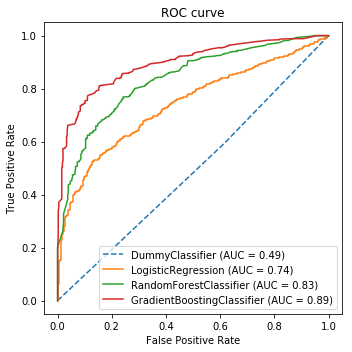

In [14]:
# Plot ROC curves for different models.
from sklearn.metrics import roc_curve, plot_roc_curve, plot_confusion_matrix, classification_report

fig, ax = plt.subplots(figsize=(5,5))
plot_roc_curve(dummy_clf, X_test, y_test, ax=ax, linestyle='--')
plot_roc_curve(lr_clf, X_test, y_test, ax=ax)
plot_roc_curve(rf_clf, X_test, y_test, ax=ax)
plot_roc_curve(gb_clf, X_test, y_test, ax=ax)

ax.set_title('ROC curve')
plt.tight_layout()
# plt.savefig('./figures/roc_curves_dummy_lr_rf_gb.png')
plt.show()

In [15]:
# make a table summarizing accuracy, precision, recall and F1-score for different models.

summed_values = {'precision':[], 'recall':[], 'f1-score':[]}

# dummy classifier.
y_test_predicted = dummy_clf.predict(X_test)
cls_report = classification_report(y_test, y_test_predicted, output_dict=dict)
summed_values['precision'].append(cls_report['weighted avg']['precision'])
summed_values['recall'].append(cls_report['weighted avg']['recall'])
summed_values['f1-score'].append(cls_report['weighted avg']['f1-score'])

# logistic regression.
y_test_predicted = lr_clf.predict(X_test)
cls_report = classification_report(y_test, y_test_predicted, output_dict=dict)
summed_values['precision'].append(cls_report['weighted avg']['precision'])
summed_values['recall'].append(cls_report['weighted avg']['recall'])
summed_values['f1-score'].append(cls_report['weighted avg']['f1-score'])

# random forest classifier.
y_test_predicted = rf_clf.predict(X_test)
cls_report = classification_report(y_test, y_test_predicted, output_dict=dict)
summed_values['precision'].append(cls_report['weighted avg']['precision'])
summed_values['recall'].append(cls_report['weighted avg']['recall'])
summed_values['f1-score'].append(cls_report['weighted avg']['f1-score'])

# gradient boosting classifier.
y_test_predicted = gb_clf.predict(X_test)
cls_report = classification_report(y_test, y_test_predicted, output_dict=dict)
summed_values['precision'].append(cls_report['weighted avg']['precision'])
summed_values['recall'].append(cls_report['weighted avg']['recall'])
summed_values['f1-score'].append(cls_report['weighted avg']['f1-score'])

df = pd.DataFrame(summed_values,
                  index=['DummyClassifier','LogisticRegression', \
                         'RandomForestClassifier', 'GradientBoostingClassifier'])
df.index.name = 'Model'

print(df)

                            precision    recall  f1-score
Model                                                    
DummyClassifier              0.529004  0.529004  0.529004
LogisticRegression           0.710642  0.664069  0.666178
RandomForestClassifier       0.749342  0.751515  0.744928
GradientBoostingClassifier   0.810110  0.811255  0.810377


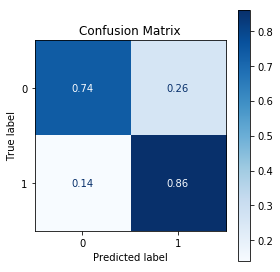

In [16]:
# plot the confusion matrix for GBClassifier.
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(4,4))
plot_confusion_matrix(gb_clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
ax.set_title('Confusion Matrix')

plt.tight_layout()
# plt.savefig('./figures/gb_confusion_matrix.png')
plt.show()

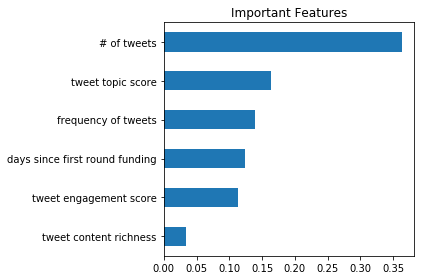

In [189]:
# plot the feature importance for GBClassifier.
feature_imps = pd.Series(gb_clf.feature_importances_, index=selected_features[:-1]).sort_values(ascending=False)
feature_imps = feature_imps.rename({'postA_tweet_num': '# of tweets',
                                    'tweets_pos_topic_score': 'tweet topic score',
                                    'postA_tweet_freq': 'frequency of tweets',
                                    'days_since_first_funding': 'days since first round funding',
                                    'postA_tweet_interactiveness': 'tweet engagement score',
                                    'postA_tweet_content_richness': 'tweet content richness'})

fig, ax = plt.subplots(figsize=(6, 4))
feature_imps[:6].sort_values(ascending=True).plot(kind='barh')
ax.set_title('Important Features')
plt.tight_layout()
# plt.savefig('./figures/gb_important_features.png')
plt.show()

## Plotly for Web App

In [93]:
# Show tweet scores as horizontal bar plot.

import plotly.graph_objects as go

x = [80, 14, 23, 50, 40]
y = ['tweet sentiment', 'tweet topic', 'tweet engagement', 'length of tweets', 'number of tweets', ]

fig = go.Figure(data=[
    go.Bar(x=x,
           y=y,
           hovertext = ['This startup is doing better than {}% companies on {}'\
                        .format(x[i], y[i]) for i in range(len(x))],
           orientation='h',
           marker=dict(color='blue', line=dict(color='white', width=1)),
           hoverinfo='text'),
    go.Bar(x=[100-x_ for x_ in x],
           y=y,
           orientation='h',
           marker_color='lightgray',
           hoverinfo='skip')])

fig.update_layout(barmode='stack',
                  autosize=True,
                  showlegend=False,
                  title={'text': "Twitter Performance of Startup",
                         'x':0.5,
                         'y':0.90,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                 xaxis={'title':'percentile ranking',},)
fig.show()

In [91]:
# show category feature as pie chart.
from plotly.subplots import make_subplots

name_industry = ["software", "others"]
num_industry = [50, 100]
num_startup = [10, 5]

fig = make_subplots(rows=2,
                    cols=2,
                    specs=[{"type": "pie"}, {"type": "pie"}],
                    subplot_titles=['How many startups are in this industry?',\
                                    'How many startups succeeded in this industry?'])

fig.add_trace(go.Pie(name = "",
                     values = num_industry,
                     labels = name_industry,
                     text = name_industry,
                     hoverinfo = 'label+percent+name',),
              row=1, col=1)

fig.add_trace(go.Pie(name = "",
                     values = num_startup,
                     labels = ['success', 'failure'],
                     text = ['success', 'failure'],
                     hoverinfo = 'label+percent+name',),
              row=1, col=2)

fig.update_layout(autosize=True,
                  showlegend=False,)
fig.show()

In [193]:
# combine category plot and tweet plot into one figure, and prepare for front-end integration.

# output numbers in front-end.
predicted_proba = 0.735
category_stats = {"Software": {'category_pct': 0.10, 'success_pct': 0.642}}
tweets_stats = {"tweet_number_ranking": 54.8,
                "tweet_length_ranking": 70.5,
                "tweet_engagement_ranking": 27.1,
                "tweets_topic_ranking": 13.7,
                "tweets_sentiment_ranking": 80.3,}

# convert output numbers to plot input lists.
name_success = ["success", "failure"]
name_industry = [list(category_stats.keys())[0], 'Others']
success_pcts_startup = [predicted_proba, 1.0-predicted_proba]
success_pcts_industry = [category_stats[name_industry[0]]['success_pct'],\
                         1.0-category_stats[name_industry[0]]['success_pct']]
industry_pcts = [category_stats[name_industry[0]]['category_pct'],\
                 1.0-category_stats[name_industry[0]]['category_pct']]

x_tweet_stats = [tweets_stats["tweets_sentiment_ranking"],\
                 tweets_stats["tweets_topic_ranking"],\
                 tweets_stats["tweet_engagement_ranking"],\
                 tweets_stats["tweet_length_ranking"],\
                 tweets_stats["tweet_number_ranking"]]
y_tweet_statnames = ['tweet sentiment', 'tweet topic', 'tweet engagement', 'length of tweets', 'number of tweets', ]


# make plots.
fig = make_subplots(rows=2,
                    cols=3,
                    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}],\
                           [{"type": "bar", "rowspan": 1,"colspan": 3}, None, None]],

                    subplot_titles=["This startup's <br>Success Chance",
                                    'Success Chance <br>in {} Industry'.format(list(category_stats.keys())[0]),\
                                    'Proportion of startups <br>in {} Industry'\
                                    .format(list(category_stats.keys())[0]),
                                    "This Startup's Twitter Performance",\
                                    '',\
                                    ''],)
                    # subplot_titles=["This startup's <br>Success Chance",\
                    #                 "This Startup's Twitter Performance",\
                    #                 'Success Chance <br>in {} Industry'.format(list(category_stats.keys())[0]),\
                    #                 'Proportion of {} Industry in all starups'\
                    #                 .format(list(category_stats.keys())[0]),])

# pie plot: "This startup's Success Chance"
fig.add_trace(go.Pie(name = "",
                     values = success_pcts_startup,
                     labels = ['success', 'failure'],
                     hovertext = ['The {} chance of this startup is {:.1%}'\
                            .format(name_success[i], success_pcts_startup[i]) for i in range(len(name_success))],
                     text = ['success', 'failure'],
                     textposition='inside',
                     marker=dict(colors=['darkcyan','darkred']),
                     hoverinfo = 'text',),
             row=1, col=1)

# pie plot: 'Industry-average Success Chance'
fig.add_trace(go.Pie(name = "",
                     values = success_pcts_industry,
                     labels = ['success', 'failure'],
                     hovertext = ['The {} chance of all startups in this industry is {:.1%}'\
                            .format(name_success[i], success_pcts_industry[i]) for i in range(len(name_success))],
                     text = ['success', 'failure'],
                     textposition='inside',
                     marker=dict(colors=['darkgreen','purple']),
                     hoverinfo = 'text',),
             row=1, col=2)

# pie plot: 'Industry Proportion'
fig.add_trace(go.Pie(name = "",
                     values = industry_pcts,
                     labels = name_industry,
                     hovertext = ['The proportion of startups in \"{}\" industry is {:.1%}'\
                                 .format(name_industry[i], industry_pcts[i]) for i in range(len(name_industry))],
                     text = name_industry,
                     textposition='inside',
                     marker=dict(colors=['deeppink','gray']),
                     hoverinfo = 'text',),
             row=1, col=3)

# bar plot: 'Twitter Performance'
fig.add_trace(go.Bar(x=x_tweet_stats,
                     y=y_tweet_statnames,
                     hovertext = ['This startup is doing better than {:.1%} companies on {}'\
                                .format(x_tweet_stats[i]/100.0, y_tweet_statnames[i]) for i in range(len(x_tweet_stats))],
                     orientation='h',
                     marker=dict(color='blue', line=dict(color='white', width=1)),
                     hoverinfo='text'),
             row=2, col=1)

fig.add_trace(go.Bar(x=[100-x_ for x_ in x_tweet_stats],
                     y=y_tweet_statnames,
                     orientation='h',
                     marker_color='lightgray',
                     hoverinfo='skip'),
              row=2, col=1)

fig.update_layout(barmode='stack',
                  autosize=True,
                  showlegend=False,
                  xaxis={'title':'percentile ranking',},)


fig.show()
# graphJSON = fig.to_json()
